In [9]:
import os
import numpy as np
from hytempo.core import rocketfactory,trajectory_estimator,components,rocket,plotting,data_handling
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib as mpl


Setup Parameters

In [10]:
"create components"
#create structures
nosecone = components.Component(mass=3,name="structures",length=0.53,hulltube=False)
radaxe = components.Component(mass=2.0,name="radaxe",length=0.05,hulltube=False)
finnen = components.Component(mass=2.0,name="fins",length=0.0,hulltube=False)
boattail = components.Component(mass=0.200,name="boattail",length=0.0,hulltube=False)

# subsystems
avionic = components.Component(mass=1.8,name="avionic",length=0.25,hulltube=True)
recovery = components.Component(mass=10,name="recovery",length=0.25,hulltube=True)
fluid_system = components.Component(mass=7.0,name="fluid_system",length=0.98,hulltube=True)
parts = []

parts.append(nosecone)
parts.append(radaxe)
parts.append(finnen)
parts.append(boattail)
parts.append(avionic)
parts.append(recovery)
parts.append(fluid_system)


"Import CD LUT"
absolute_path = os.path.dirname(os.path.abspath("__file__"))
relative_path = "hytempo\LUTs\CD_Map.csv"
absolute_path = absolute_path[:absolute_path.rfind("\\") ]                 
path = os.path.join(absolute_path, relative_path)
CD_tab = np.genfromtxt(path, delimiter=";")

"Setup variables"
#diameters = [0.1,0.2]
#burn_times = [10,15]
#thrust = [1000,2000]
of = [3,7]
#chamberPressure = [5e6,8e6]
#expansionRatio = [10,20]
#pressurantPressureFactor = [2,5]
#launch_angle = [80,85]

diameters = 0.25
burn_times = 25
thrust = 8000
#of = 4.8
chamberPressure = 6e6
expansionRatio = 10
pressurantPressureFactor = 4
launch_angle = 88

Build and simulate the rockets

In [11]:
#create the hdf5 file
name = "LiquidSim"
hdf_file = data_handling.create_hdf5_file(name, overwrite=False)

#create rockets
factory = rocketfactory.Liquid_CEA_TypeVTank_RegNitrous()
rockets = factory.build_swarm(
    hdf_file=hdf_file,
    diameters = diameters,
    burnTimes = burn_times,
    thrusts = thrust,
    ofs = of,
    chamberPressures = chamberPressure,
    expansionRatios = expansionRatio,
    pressurantPressureFactors = pressurantPressureFactor,
    launchAngles=launch_angle,
    componentList=parts,
    fuel="ETHANOL",
    fuelTemp=300,
    ox="N2O",
    oxTemp=300,
    pressurant="HELIUM",
    pressurantTemp=300,
    dragCoefficient=CD_tab,
    engineMass=4,
    engineLength=0.3,
    fuelTankSafetyFactor=1.5,
    oxTankSafetyFactor=1.5,
    pressurantTankSafetyFactor=1.5,
    thicknessEndCap=0.0015,
    cfrpTensileStrength=600e6,
    nRockets=20)

#loop over rockets and simulate trajectories
print(f"Start simulating {len(rockets)} rockets...")
for i,indRocket in enumerate(rockets):
    #create estimator and simulate trajectory
    print(f"Simulating rocket {i+1} of {len(rockets)}: {indRocket.name}")
    sim = trajectory_estimator.TrajectoryEstimator(indRocket,hdf_file)
    try:
        trajectory = sim.integrate_trajectory()
    except Exception as e:
        print("ERROR:")
        print(e)
        print(f"Simulation failed for rocket {indRocket.name} . Skipping...")
print("All rockets simulated. Closing hdf5 file...")    
#close the hdf5 file
file_path = data_handling.close_hdf5_file(hdf_file)

Setting up factory for rockets with:
 - Single liquid engine with CEA isp model
 - Type V CFK tanks for fuel, oxidizer and pressurant
 - Regenerative cooling with Nitrous oxide
Start building rockets!
Buildung rocket:  1  of  20
Buildung rocket:  2  of  20
Buildung rocket:  3  of  20
Buildung rocket:  4  of  20
Buildung rocket:  5  of  20
Buildung rocket:  6  of  20
Buildung rocket:  7  of  20
Buildung rocket:  8  of  20
Buildung rocket:  9  of  20
Buildung rocket:  10  of  20
Buildung rocket:  11  of  20
Buildung rocket:  12  of  20
Buildung rocket:  13  of  20
Buildung rocket:  14  of  20
Buildung rocket:  15  of  20
Buildung rocket:  16  of  20
Buildung rocket:  17  of  20
Buildung rocket:  18  of  20
Buildung rocket:  19  of  20
Buildung rocket:  20  of  20
Start simulating 20 rockets...
Simulating rocket 1 of 20: Rocket_0
Simulating rocket 2 of 20: Rocket_1
Simulating rocket 3 of 20: Rocket_2
Simulating rocket 4 of 20: Rocket_3
Simulating rocket 5 of 20: Rocket_4
Simulating rocket

Plot the results

'pP.plot_1D(x="of",\n            y = ["tanks.ETHANOLtank.mass","tanks.N2Otank.mass","tanks.HELIUMtank.mass"],\n              xlabel="O/F [-]",\n                ylabel="Tank Mass [kg]",)\n'

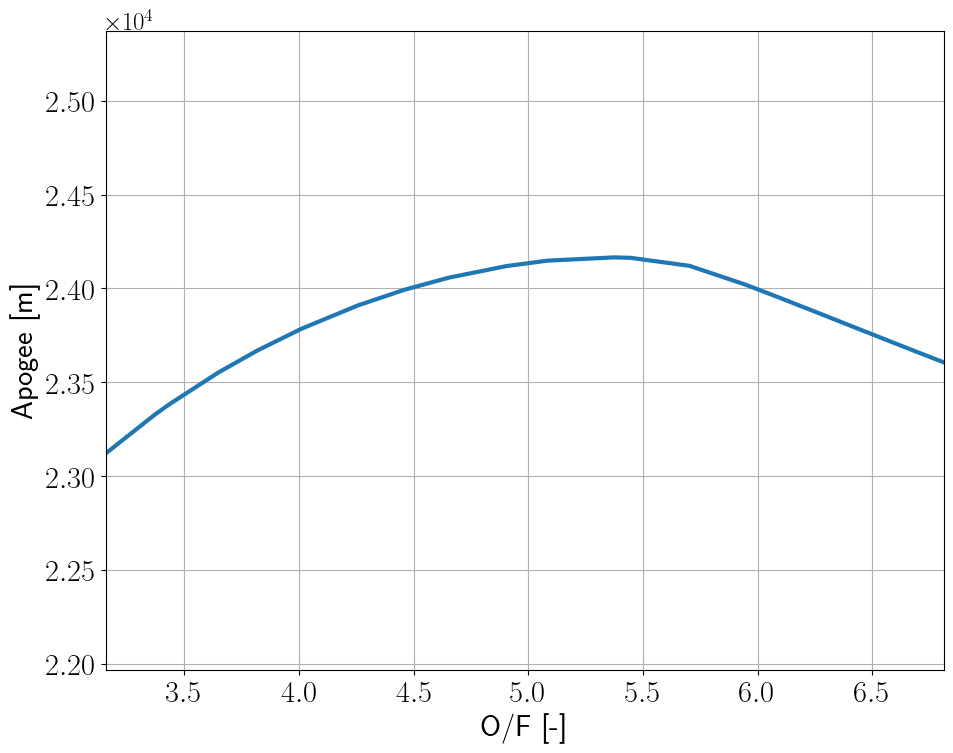

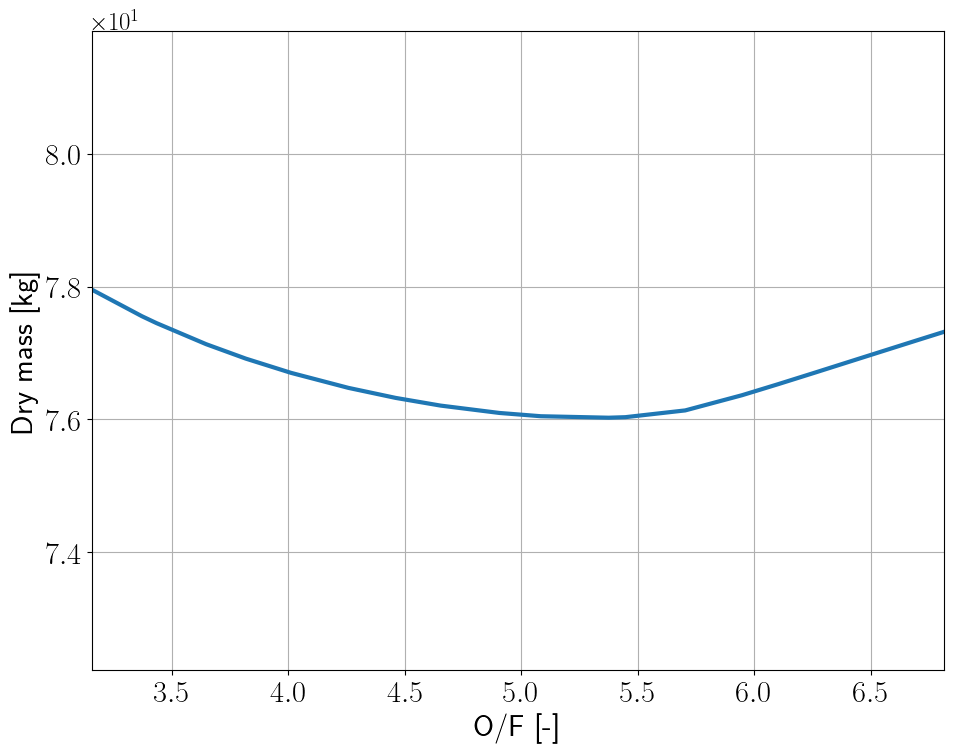

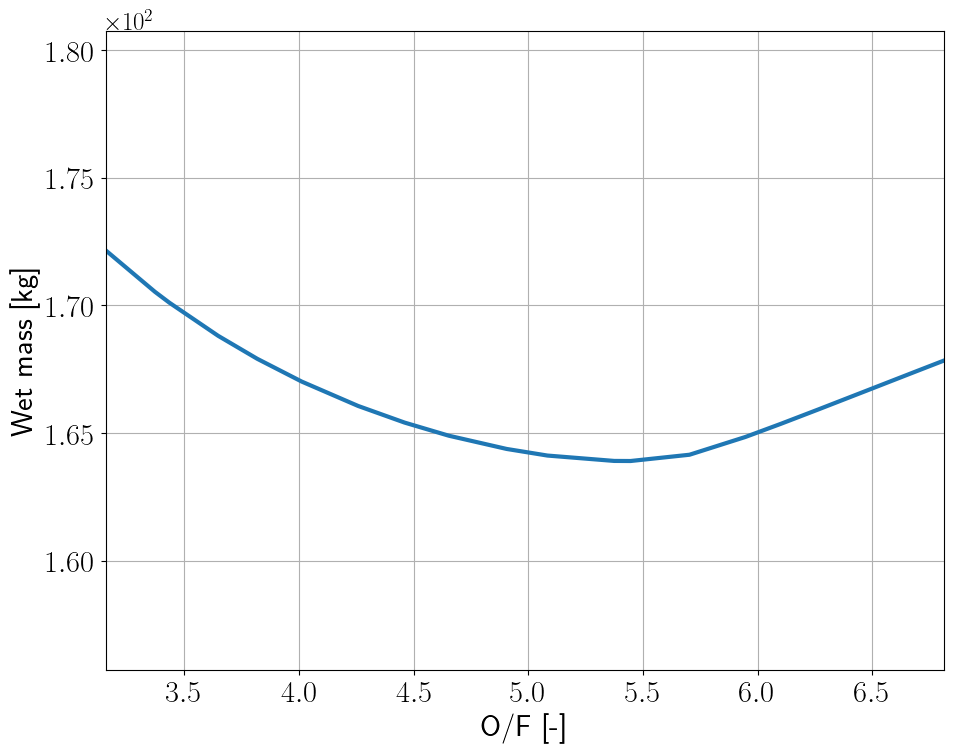

In [13]:
#create performance plotter
pP = plotting.PerformancePlotter(file_path)

#plot 1d
pP.plot_1D(x="of",
            y = "metrics.apogee",
           xlabel="O/F [-]",
           ylabel="Apogee [m]",)
pP.plot_1D(x="of",
          y = "metrics.dry_mass",
           xlabel="O/F [-]",
           ylabel="Dry mass [kg]",)
pP.plot_1D(x="of",
          y = "metrics.wet_mass",
           xlabel="O/F [-]",
           ylabel="Wet mass [kg]",)
"""pP.plot_1D(x="of",
            y = ["tanks.ETHANOLtank.mass","tanks.N2Otank.mass","tanks.HELIUMtank.mass"],
              xlabel="O/F [-]",
                ylabel="Tank Mass [kg]",)
"""
#plot 2d 
#pP.plot_2D(x="chamberPressure",
#           y="pressurantTankPressure",
#           z="metrics.apogee",
#           xlabel="Chamber Pressure [Pa]",
#           ylabel="Pressurant Tank Pressure [Pa]",
#           zlabel="Apogee [m]",)